# A practical introduction to Keras Callbacks

This is a notebook for the medium article [A practical introduction to Keras Callbacks](https://medium.com/@bindiatwork/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

### Helper function to plot metric

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [4]:
def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [5]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

## Fashion MMIST dataset

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
# For faster training, let's use a subset 10,000
X_train, y_train = X_train_full[:10000] / 255.0, y_train_full[:10000]

## Building a NN model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model(): 
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(300, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    model.compile(
        optimizer='sgd', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 1. EarlyStopping

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stopping = EarlyStopping()

In [11]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[early_stopping]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 - 6s - loss: 1.5632 - accuracy: 0.5504 - val_loss: 1.1315 - val_accuracy: 0.6605
Epoch 2/50
8000/8000 - 3s - loss: 0.9598 - accuracy: 0.7025 - val_loss: 0.8737 - val_accuracy: 0.7045
Epoch 3/50
8000/8000 - 2s - loss: 0.7890 - accuracy: 0.7441 - val_loss: 0.7667 - val_accuracy: 0.7335
Epoch 4/50
8000/8000 - 2s - loss: 0.7075 - accuracy: 0.7679 - val_loss: 0.7185 - val_accuracy: 0.7500
Epoch 5/50
8000/8000 - 2s - loss: 0.6556 - accuracy: 0.7831 - val_loss: 0.6567 - val_accuracy: 0.7715
Epoch 6/50
8000/8000 - 2s - loss: 0.6142 - accuracy: 0.7977 - val_loss: 0.6287 - val_accuracy: 0.7790
Epoch 7/50
8000/8000 - 3s - loss: 0.5885 - accuracy: 0.8009 - val_loss: 0.6041 - val_accuracy: 0.7945
Epoch 8/50
8000/8000 - 2s - loss: 0.5635 - accuracy: 0.8094 - val_loss: 0.6000 - val_accuracy: 0.7935
Epoch 9/50
8000/8000 - 2s - loss: 0.5452 - accuracy: 0.8161 - val_loss: 0.5662 - val_accuracy: 0.8005
Epoch 10/50
8000/8000 - 2s - loss:

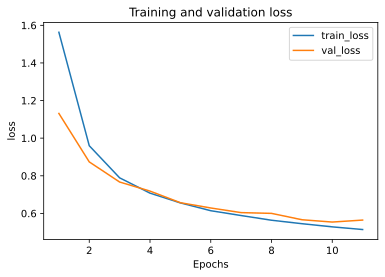

In [24]:
plot_metric(history, 'loss')

#### Customizing early stopping

In [14]:
# Create a new model
model = create_model()

In [21]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=3, 
    min_delta=0.001, 
    mode='max'
)

In [22]:
history_custom = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 - 5s - loss: 1.5685 - accuracy: 0.5612 - val_loss: 1.1267 - val_accuracy: 0.6675
Epoch 2/50
8000/8000 - 2s - loss: 0.9486 - accuracy: 0.7104 - val_loss: 0.8624 - val_accuracy: 0.7200
Epoch 3/50
8000/8000 - 2s - loss: 0.7890 - accuracy: 0.7434 - val_loss: 0.7680 - val_accuracy: 0.7525
Epoch 4/50
8000/8000 - 2s - loss: 0.7080 - accuracy: 0.7684 - val_loss: 0.7030 - val_accuracy: 0.7595
Epoch 5/50
8000/8000 - 2s - loss: 0.6551 - accuracy: 0.7856 - val_loss: 0.6591 - val_accuracy: 0.7745
Epoch 6/50
8000/8000 - 2s - loss: 0.6172 - accuracy: 0.7939 - val_loss: 0.6421 - val_accuracy: 0.7785
Epoch 7/50
8000/8000 - 2s - loss: 0.5886 - accuracy: 0.8037 - val_loss: 0.6062 - val_accuracy: 0.7985
Epoch 8/50
8000/8000 - 2s - loss: 0.5642 - accuracy: 0.8098 - val_loss: 0.5902 - val_accuracy: 0.7980
Epoch 9/50
8000/8000 - 2s - loss: 0.5462 - accuracy: 0.8180 - val_loss: 0.5729 - val_accuracy: 0.8030
Epoch 10/50
8000/8000 - 2s - loss:

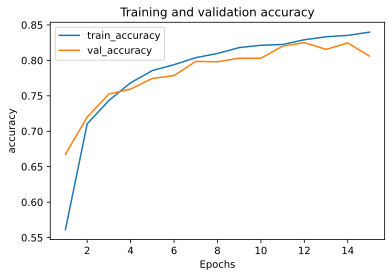

In [23]:
plot_metric(history_custom, 'accuracy')

### 2. CSVLogger

In [25]:
from tensorflow.keras.callbacks import CSVLogger

In [26]:
csv_log = CSVLogger("results.csv")

In [27]:
# Create a new model
model = create_model()

In [28]:
history_csv_logger = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[csv_log]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 - 7s - loss: 1.6322 - accuracy: 0.5404 - val_loss: 1.1908 - val_accuracy: 0.6285
Epoch 2/10
8000/8000 - 3s - loss: 0.9995 - accuracy: 0.6883 - val_loss: 0.9034 - val_accuracy: 0.6965
Epoch 3/10
8000/8000 - 3s - loss: 0.8190 - accuracy: 0.7281 - val_loss: 0.7913 - val_accuracy: 0.7280
Epoch 4/10
8000/8000 - 3s - loss: 0.7333 - accuracy: 0.7551 - val_loss: 0.7253 - val_accuracy: 0.7595
Epoch 5/10
8000/8000 - 2s - loss: 0.6788 - accuracy: 0.7725 - val_loss: 0.6813 - val_accuracy: 0.7810
Epoch 6/10
8000/8000 - 2s - loss: 0.6385 - accuracy: 0.7891 - val_loss: 0.6483 - val_accuracy: 0.7860
Epoch 7/10
8000/8000 - 2s - loss: 0.6062 - accuracy: 0.7968 - val_loss: 0.6201 - val_accuracy: 0.7900
Epoch 8/10
8000/8000 - 2s - loss: 0.5791 - accuracy: 0.8064 - val_loss: 0.6258 - val_accuracy: 0.7780
Epoch 9/10
8000/8000 - 2s - loss: 0.5590 - accuracy: 0.8100 - val_loss: 0.5932 - val_accuracy: 0.7945
Epoch 10/10
8000/8000 - 2s - loss:

In [29]:
# Load the CSV
import pandas as pd

pd.read_csv("results.csv", index_col='epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.540375,1.632193,0.6285,1.190760
1,0.688250,0.999455,0.6965,0.903381
2,0.728125,0.818999,0.7280,0.791272
3,0.755125,0.733289,0.7595,0.725264
4,0.772500,0.678768,0.7810,0.681306
5,0.789125,0.638452,0.7860,0.648267
6,0.796750,0.606171,0.7900,0.620067
7,0.806375,0.579147,0.7780,0.625771
8,0.810000,0.559040,0.7945,0.593174


## 3. ModelCheckpoint

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
checkpoint_path = 'model_checkpoints/'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=True,
    verbose=1
)

In [42]:
# Create a new model
model = create_model()

In [43]:
history_checkpoint = model.fit(
    X_train, 
    y_train, 
    epochs=5, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[checkpoint]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10

Epoch 00001: saving model to model_checkpoints/
8000/8000 - 3s - loss: 1.5483 - accuracy: 0.5533 - val_loss: 1.1100 - val_accuracy: 0.6785
Epoch 2/10

Epoch 00002: saving model to model_checkpoints/
8000/8000 - 1s - loss: 0.9443 - accuracy: 0.7212 - val_loss: 0.8616 - val_accuracy: 0.7140
Epoch 3/10

Epoch 00003: saving model to model_checkpoints/
8000/8000 - 1s - loss: 0.7846 - accuracy: 0.7509 - val_loss: 0.7594 - val_accuracy: 0.7530
Epoch 4/10

Epoch 00004: saving model to model_checkpoints/
8000/8000 - 1s - loss: 0.7058 - accuracy: 0.7742 - val_loss: 0.7243 - val_accuracy: 0.7405
Epoch 5/10

Epoch 00005: saving model to model_checkpoints/
8000/8000 - 1s - loss: 0.6549 - accuracy: 0.7880 - val_loss: 0.6744 - val_accuracy: 0.7640
Epoch 6/10

Epoch 00006: saving model to model_checkpoints/
8000/8000 - 2s - loss: 0.6180 - accuracy: 0.7961 - val_loss: 0.6382 - val_accuracy: 0.7890
Epoch 7/10

Epoch 00007: saving model to model

In [44]:
get_test_accuracy(model, X_test, y_test)

accuracy: 0.787


#### Create a new model and load weights

In [45]:
# Create a new model
new_model = create_model()

In [46]:
# Without loading weight
get_test_accuracy(new_model, X_test, y_test)

accuracy: 0.086


In [39]:
# Load weights
new_model.load_weights('model_checkpoints/')
# Now test it and the accuracy should be the same as before
get_test_accuracy(new_model, X_test, y_test)

accuracy: 0.779


## 4. ReduceLROnPlateau

In [80]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [81]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
)

In [82]:
# Create a new model
model = create_model()

In [83]:
history_reduce_lr = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[reduce_lr]
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 - 4s - loss: 1.6223 - accuracy: 0.5167 - val_loss: 1.1810 - val_accuracy: 0.6575
Epoch 2/50
8000/8000 - 1s - loss: 0.9956 - accuracy: 0.6915 - val_loss: 0.8968 - val_accuracy: 0.7085
Epoch 3/50
8000/8000 - 1s - loss: 0.8161 - accuracy: 0.7370 - val_loss: 0.7827 - val_accuracy: 0.7520
Epoch 4/50
8000/8000 - 1s - loss: 0.7271 - accuracy: 0.7640 - val_loss: 0.7191 - val_accuracy: 0.7550
Epoch 5/50
8000/8000 - 1s - loss: 0.6707 - accuracy: 0.7785 - val_loss: 0.6707 - val_accuracy: 0.7650
Epoch 6/50
8000/8000 - 1s - loss: 0.6280 - accuracy: 0.7920 - val_loss: 0.6507 - val_accuracy: 0.7650
Epoch 7/50
8000/8000 - 1s - loss: 0.5994 - accuracy: 0.7994 - val_loss: 0.6285 - val_accuracy: 0.7845
Epoch 8/50
8000/8000 - 1s - loss: 0.5739 - accuracy: 0.8090 - val_loss: 0.5990 - val_accuracy: 0.7895
Epoch 9/50
8000/8000 - 1s - loss: 0.5556 - accuracy: 0.8146 - val_loss: 0.5936 - val_accuracy: 0.7960
Epoch 10/50
8000/8000 - 1s - loss:

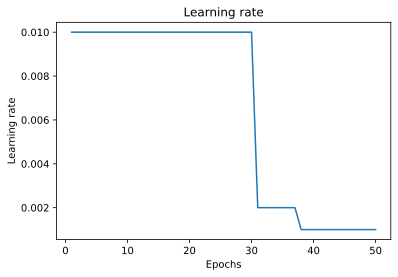

In [84]:
plot_lr(history_reduce_lr)

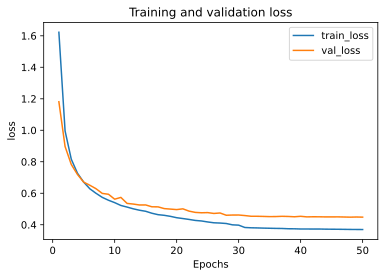

In [85]:
plot_metric(history_reduce_lr, 'loss')

## 5. LearningRateScheduler

In [86]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [90]:
def lr_decay(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        return lr * 0.2
    return lr

In [91]:
# Create a new model
model = create_model()

In [92]:
history_lr_schedule = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[LearningRateScheduler(lr_decay, verbose=1)]
)

Train on 8000 samples, validate on 2000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 1/20
8000/8000 - 3s - loss: 1.5567 - accuracy: 0.5614 - val_loss: 1.1245 - val_accuracy: 0.6720

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 2/20
8000/8000 - 1s - loss: 0.9460 - accuracy: 0.7106 - val_loss: 0.8574 - val_accuracy: 0.7265

Epoch 00003: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 3/20
8000/8000 - 1s - loss: 0.7757 - accuracy: 0.7487 - val_loss: 0.7673 - val_accuracy: 0.7380

Epoch 00004: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 4/20
8000/8000 - 1s - loss: 0.6925 - accuracy: 0.7740 - val_loss: 0.7008 - val_accuracy: 0.7545

Epoch 00005: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 5/20
8000/8000 - 1s - loss: 0.6433 - accuracy: 0.7851 - val_loss: 0.6497 - val_accuracy: 0.7720

Epoch 00006: Learning

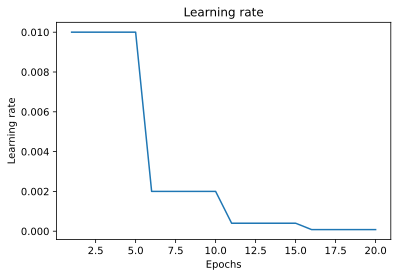

In [93]:
plot_lr(history_lr_schedule)

## 6. LambdaCallback

In [72]:
from tensorflow.keras.callbacks import LambdaCallback

In [73]:
epoch_callback = LambdaCallback(
    on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1))
)

batch_loss_callback = LambdaCallback(
    on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
)

train_finish_callback = LambdaCallback(
    on_train_end=lambda logs: print('Training finished!')
)

In [74]:
# Create a new model
model = create_model()

In [79]:
history_lambda_callback = model.fit(
    X_train, 
    y_train,
    epochs=2,                  # change epoch to 2 for demo purpose 
    validation_split=0.20, 
    batch_size=2000,           # change to 2000 for demo purpose
    verbose=False,
    callbacks=[epoch_callback, batch_loss_callback, train_finish_callback]
)

Starting Epoch 1!

 After batch 0, the loss is    0.41.

 After batch 1, the loss is    0.41.

 After batch 2, the loss is    0.42.

 After batch 3, the loss is    0.39.
Starting Epoch 2!

 After batch 0, the loss is    0.40.

 After batch 1, the loss is    0.42.

 After batch 2, the loss is    0.41.

 After batch 3, the loss is    0.41.
Training finished!


## That's it

Thanks

This is a notebook for the medium article [A practical introduction to Keras Callbacks](https://medium.com/@bindiatwork/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966)

Please check out article for instructions